# Week4-Pandas

## 판다스(Pandas) 소개
p.3~4  
- 데이터 처리(data processing)를 위한 파이썬 라이브러리
- 행(row) x 열(column) 2차원 테이블 형태로 구성되는 데이터를 처리하기에 적합
- 데이터 분석과 기계학습을 위해 사용되는 실제 데이터는 다양한 타입을 가짐
- 단일 수치형 데이터 처리에 적합한 넘파이는 다종 데이터 처리에 부적절

## 데이터 프레임(DataFrame) 생성, 수정, 삭제
p. 5~24
- 행(row)과 열(column)의 형태로 표현되는 데이터
- 각 컬럼은 1차원 ndarray랑 비슷한 Series로 표현
- 각 데이터를 식별하는 Index값 존재

#### 타이타닉 데이터를 다운로드
https://www.kaggle.com/c/titanic/data  
다운로드 후, titanic_train.csv로 주피터노트북과 같은 폴더에 저장

#### csv
- 콤마로 구분된 데이터 파일
- 간단한 데이터를 저장하기 위해 많이 사용되며, 콤마로 데이터 컬럼을 구분
- 각가의 행이 서로 다른 데이터를 나타내며, 첫 줄은 일반적으로 컬럼 이름을 사용

#### 판다스에서 데이터 로드: read_csv()

In [1]:
import pandas as pd

In [2]:
titanic_df = pd.read_csv('titanic_train.csv')
titanic_df.head()    # 앞의 5개 출력

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### DataFrame 정보 보기

In [3]:
# titanic_df의 타입
print("titanic 변수: ", type(titanic_df))

titanic 변수:  <class 'pandas.core.frame.DataFrame'>


In [4]:
# (데이터 개수) X (데이터 종류 개수) == row * column
titanic_df.shape

(891, 12)

In [5]:
# 데이터 수, 컬럼 데이터 타입 등 조회
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
# 숫자형 컬럼에 대한 정보 보기
titanic_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
# 특정 컬럼 가져오기
titanic_pclass = titanic_df["Pclass"]
titanic_pclass.head()

0    3
1    1
2    3
3    1
4    3
Name: Pclass, dtype: int64

In [8]:
# 특정 컬럼의 값 분포 확인
titanic_pclass.value_counts()
# 3등석이 491개, 1등석이 216개, 2등석이 184개

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [9]:
# 컬럼의 순서대로 value_counts 보여주기
titanic_pclass.value_counts(sort=False)

1    216
2    184
3    491
Name: Pclass, dtype: int64

#### DataFrame과 다른 데이터 간 상호 변환
- 1차원 데이터 변환: 리스트, ndarray → DataFrame

In [10]:
import numpy as np

col_name1 = ['col1']
list1 = [1, 2, 3]
array1 = np.array(list1)
print('array1 shape: ', array1.shape)

# 리스트를 이용해 DataFrame 생성
df_list1 = pd.DataFrame(list1, columns=col_name1)
print("1차원 리스트로 만든 DataFrame:\n", df_list1)

# 넘파이 ndarray 를 이용해 DataFrame 생성
df_array1 = pd.DataFrame(array1, columns=col_name1)
print("1차원 ndarray로 만든 DataFrame:\n", df_array1)

array1 shape:  (3,)
1차원 리스트로 만든 DataFrame:
    col1
0     1
1     2
2     3
1차원 ndarray로 만든 DataFrame:
    col1
0     1
1     2
2     3


- 2차원 데이터 변환: 리스트, ndarray, 딕셔너리 → DataFrame

In [11]:
# 3개의 칼럼명이 필요함
col_name2 = ['col1', 'col2', 'col3']

# 2행x3열 형태의 리스트와 ndarray 생성한 뒤 이를 DataFrame으로 변환
list2 = [[1, 2, 3], [11, 12, 13]]
array2 = np.array(list2)
print("array2 shape: ", array2.shape)

# 2차원 리스트로 만든 DataFrame
df_list2 = pd.DataFrame(list2, columns=col_name2)
print("2차원 리스트로 만든 DataFrame:\n", df_list2)

# 2차원 ndarray로 만든 DataFrame
df_array2 = pd.DataFrame(array2, columns=col_name2)
print("2차원 ndarray로 만든 DataFrame:\n", df_array2)

# 딕셔너리로 만든 DataFrame
# Key는 문자열 칼럼명으로, Value는 리스트형(또는 ndarray)칼럼 데이터로 매핑
dict = {'col1':[1, 11], 'col2':[2, 12], 'col3':[3, 13]}
df_dict = pd.DataFrame(dict)
print("딕셔너리로 만든 DataFrame:\n", df_dict)

array2 shape:  (2, 3)
2차원 리스트로 만든 DataFrame:
    col1  col2  col3
0     1     2     3
1    11    12    13
2차원 ndarray로 만든 DataFrame:
    col1  col2  col3
0     1     2     3
1    11    12    13
딕셔너리로 만든 DataFrame:
    col1  col2  col3
0     1     2     3
1    11    12    13


- DataFrame을 다른 데이터형으로: 머신러닝 패키지들의 인풋으로 넣기 위해 변환

In [12]:
# DataFrame을 ndarray로 변환
array3 = df_dict.values
print("df_dict.values 타입:", type(array3), "그리고 df_dict.values shape:", array3.shape)
print(array3)

df_dict.values 타입: <class 'numpy.ndarray'> 그리고 df_dict.values shape: (2, 3)
[[ 1  2  3]
 [11 12 13]]


In [13]:
# DataFrame을 리스트로 변환
list3 = df_dict.values.tolist()
print("df_dict.values.tolist() 타입:",type(list3))
print(list3)

# DataFrame을 ndarray로 변환
dict3 = df_dict.to_dict()
print("\ndf_dict.to_dict() 타입:", type(dict3))
print(dict3)

df_dict.values.tolist() 타입: <class 'list'>
[[1, 2, 3], [11, 12, 13]]

df_dict.to_dict() 타입: <class 'dict'>
{'col1': {0: 1, 1: 11}, 'col2': {0: 2, 1: 12}, 'col3': {0: 3, 1: 13}}


#### DataFrame 컬럼 추가, 수정, 삭제

In [14]:
# 새로운 컬럼에 새로운 값 추가
titanic_df['Age_0'] = 0
titanic_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_0
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0


In [15]:
# 다른 컬럼 이용해 새로운 컬럼 만들기
titanic_df['Age_by_10'] = titanic_df['Age_0'] * 10
titanic_df['Family_no'] = titanic_df['SibSp'] + titanic_df['Parch'] + 1

titanic_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_0,Age_by_10,Family_no
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,0,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,0,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,0,1


In [16]:
# 기존 컬럼값 기반 컬럼값 업데이트
titanic_df['Age_by_10'] = titanic_df['Age_by_10'] + 100

titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_0,Age_by_10,Family_no
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,100,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,100,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,100,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,100,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,100,1


#### DataFrame 데이터 삭제

In [17]:
titanic_drop_df = titanic_df.drop('Age_0', axis=1)
titanic_drop_df.head(3)
# 원래의 DataFrame에는 drop한 ['Age_0']이 그대로 남아있음
titanic_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_0,Age_by_10,Family_no
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,100,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,100,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,100,1


In [18]:
# inplace=True를 사용하면 삭제를 수행한 새로운 데이터 프레임이 리턴
drop_result = titanic_df.drop(['Age_0', 'Age_by_10', 'Family_no'], axis=1, inplace=True)
print("inplace=True로 drop 후 반환된 값:", drop_result)
titanic_df.head(3)

inplace=True로 drop 후 반환된 값: None


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


## 데이터프레임 인덱스
p. 26~29
- DataFrame, Series 등의 각 데이터(row)를 유일하게 식별하는 데이터 객체
- 기본값은 0부터 1씩 증가하는 숫자
- 값을 직접 수정할 수 없음
- reset_index(): 숫자형 인덱스를 새로 할당 후, 기존 인덱스 정보는 새로운 컬럼으로 저장


In [19]:
# 원본 파일 다시로딩
titanic_df = pd.read_csv('titanic_train.csv')

# 인덱스 객체추출
indexes = titanic_df.index
print(indexes)

# index를 모두 출력하고 싶을 때, index.values를 사용
print("Index 객체 array값:\n", indexes.values)

RangeIndex(start=0, stop=891, step=1)
Index 객체 array값:
 [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232

In [20]:
print(type(indexes.values))   # 타입은 ndarray
print(indexes.values.shape)
print("=" * 20)

print(indexes[:5].values)   # 어디서 slicing을 하든 같은 값
print(indexes.values[:5])
print("=" * 20)

print(indexes[6])    # index값은 수정 불가능

<class 'numpy.ndarray'>
(891,)
[0 1 2 3 4]
[0 1 2 3 4]
6


In [21]:
# index라는 컬럼을 만들어 기존 index를 저장
titanic_reset_df = titanic_df.reset_index(inplace=False)
titanic_reset_df.head(3)

,index,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [22]:
# reset_index()를 Series에 활용

print("### before reset_index ###")
value_counts = titanic_df['Pclass'].value_counts()
print(value_counts)
print("value_counts 객체 변수 타입: ", type(value_counts))

print("")

print("### After reset_index ###")
new_value_counts = value_counts.reset_index(inplace=False)   # reset_index를 해줬더니 컬럼이 생기면서 df가 됨
print(new_value_counts)
print("new_value_counts 객체 변수 타입: ", type(new_value_counts))

### before reset_index ###
3    491
1    216
2    184
Name: Pclass, dtype: int64
value_counts 객체 변수 타입:  <class 'pandas.core.series.Series'>

### After reset_index ###
   index  Pclass
0      3     491
1      1     216
2      2     184
new_value_counts 객체 변수 타입:  <class 'pandas.core.frame.DataFrame'>


#### Series는 1차원 ndarray와 사용법이 유사함

In [46]:
s1 = pd.Series([1, 2, 3, 4])
s2 = pd.Series([2, 3, 4, 5])

s1 + s2

0    3
1    5
2    7
3    9
dtype: int64

In [47]:
s2.index = [2, 3, 4, 5]
s2

2    2
3    3
4    4
5    5
dtype: int64

In [48]:
s1 + s2

0    NaN
1    NaN
2    5.0
3    7.0
4    NaN
5    NaN
dtype: float64

In [45]:
series_fare = titanic_df['Fare']

print("Fare Series max값: ", series_fare.max())
print("Fare Series sum값: ", series_fare.sum())

print("\nsum() Fare Series: ", sum(series_fare))
print("Fare Series + 3: \n", (series_fare + 3).head())

Fare Series max값:  512.3292
Fare Series sum값:  28693.9493

sum() Fare Series:  28693.949299999967
Fare Series + 3: 
 0    10.2500
1    74.2833
2    10.9250
3    56.1000
4    11.0500
Name: Fare, dtype: float64


## 데이터 설렉션 및 필터링
p. 30~37
- 데이터 분석 및 머신러닝을 할 때 row를 선택하거나, 특정 column만을 활용하는 경우에 필요
- row,column으로 또는 index로 인덱싱 가능

#### DataFrame의 []연산자

In [49]:
print("단일 컬럼 데이터 추출:\n", titanic_df['Pclass'].head(3))
print("\n여러 칼럼의 데이터 추출:\n", titanic_df[['Survived', 'Pclass']].head(3))
print("[]안에 숫자 index는 KeyError 오류 발생:\n", titanic_df[0])

단일 컬럼 데이터 추출:
 0    3
1    1
2    3
Name: Pclass, dtype: int64

여러 칼럼의 데이터 추출:
    Survived  Pclass
0         0       3
1         1       1
2         1       3


KeyError: 0

In [50]:
# index로 행만 추출
titanic_df[0:2]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [51]:
# boolean 조건 달아서 추출
titanic_df[titanic_df['Pclass'] == 3].head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.250,NaN,S
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.925,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.050,NaN,S


#### iloc[] 연산자

In [52]:
data = {'Name': ['Chulmin', 'Eunkyung', 'Jinwoong', 'Soobeom'],
        'Year': [2011, 2016, 2015, 2015],
        'Gender': ['Male', 'Female', 'Male', 'Male']}

data_df = pd.DataFrame(data, index=['one', 'two', 'three', 'four'])
data_df

,Name,Year,Gender
one,Chulmin,2011,Male
two,Eunkyung,2016,Female
three,Jinwoong,2015,Male
four,Soobeom,2015,Male


In [53]:
# reset_index()를 사용하여 기존의 index를 컬럼으로 만듦
data_df_reset = data_df.reset_index()
data_df_reset

,index,Name,Year,Gender
0,one,Chulmin,2011,Male
1,two,Eunkyung,2016,Female
2,three,Jinwoong,2015,Male
3,four,Soobeom,2015,Male


In [35]:
# iloc는 숫자로 slicing
data_df_reset.iloc[0, 1]

'Chulmin'

In [54]:
data_df.iloc[0, 1]

2011

#### loc[] 연산자

In [55]:
data_df.loc['one', 'Name']

'Chulmin'

In [58]:
data_df_reset.loc[0, 'Name']

'Chulmin'

#### 위치 기반 인덱싱에서 슬라이싱
- iloc[0:1]: 0만 출력
- **loc**['one':'two']: **'one', 'two'모두 출력**

In [59]:
# iloc은 end숫자 전까지 출력
print("위치기반 iloc slicing\n", data_df.iloc[0:1, 1])
print("명칭기반 loc slicing\n", data_df.loc['one':'two', 'Name'])

위치기반 iloc slicing
 one    2011
Name: Year, dtype: int64
명칭기반 loc slicing
 one     Chulmin
two    Eunkyung
Name: Name, dtype: object


In [40]:
# loc이니까 숫자라도 1,2 모두 출력
data_df_reset.loc[1:2, 'Name']

1     Chulmin
2    Eunkyung
Name: Name, dtype: object

#### 불린 인덱싱
- &: AND
- |: OR
- ~: NOT
- 각 조건은 괄호로 감싸줘야 함

In [60]:
# 타이타닉 데이터 reload
titanic_df = pd.read_csv('titanic_train.csv')

# 나이가 60이상만 출력
titanic_boolean = titanic_df[titanic_df['Age'] > 60]
print(type(titanic_boolean))
titanic_boolean.head(3)

<class 'pandas.core.frame.DataFrame'>


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
33,34,0,2,"Wheadon, Mr. Edward H",male,66.0,0,0,C.A. 24579,10.5000,NaN,S
54,55,0,1,"Ostby, Mr. Engelhart Cornelius",male,65.0,0,1,113509,61.9792,B30,C
96,97,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C


In [42]:
# 대괄호 주의
# age가 60이상인 것들 중에서 name과 age만 출력
titanic_df[titanic_df['Age'] > 60][['Name', 'Age']].head()

,Name,Age
33,"Wheadon, Mr. Edward H",66.0
54,"Ostby, Mr. Engelhart Cornelius",65.0
96,"Goldschmidt, Mr. George B",71.0
116,"Connors, Mr. Patrick",70.5
170,"Van der hoef, Mr. Wyckoff",61.0


In [43]:
#위랑 같은 내용
titanic_df.loc[titanic_df['Age'] > 60, ['Name', 'Age']].head()

,Name,Age
33,"Wheadon, Mr. Edward H",66.0
54,"Ostby, Mr. Engelhart Cornelius",65.0
96,"Goldschmidt, Mr. George B",71.0
116,"Connors, Mr. Patrick",70.5
170,"Van der hoef, Mr. Wyckoff",61.0


In [44]:
# 여러 조건 결합하기
titanic_df[(titanic_df['Age'] > 60) & (titanic_df['Pclass']==1) & (titanic_df['Sex']=='female')]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
275,276,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.0,1,0,13502,77.9583,D7,S
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0000,B28,NaN


## 데이터 정렬 및 통계값 뽑기
p. 38~42
- 특정 값을 기반으로 정렬할 때가 있음
- sort_values(by=[''], ascending, inplace): by의 컬럼값을 이용해서 정렬
- min(): 최솟값
- max(): 최댓값
- sum(): 합
- count(): 갯수
- mean(): 평균값
- median(): 중앙값
- groupby(): 특정 컬럼값에 기반하여 데이터를 나눈 후, 대푯값을 뽑아야 하는 경우 사용

In [61]:
titanic_sorted = titanic_df.sort_values(by=['Name'])
titanic_sorted.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
845,846,0,3,"Abbing, Mr. Anthony",male,42.0,0,0,C.A. 5547,7.55,NaN,S
746,747,0,3,"Abbott, Mr. Rossmore Edward",male,16.0,1,1,C.A. 2673,20.25,NaN,S
279,280,1,3,"Abbott, Mrs. Stanton (Rosa Hunt)",female,35.0,1,1,C.A. 2673,20.25,NaN,S


In [63]:
# 첫번째 컬럼부터 정렬 후, 두번째 컬럼 정렬
titanic_sorted = titanic_df.sort_values(by=['Pclass', 'Name'], ascending=False)
titanic_sorted.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5,NaN,S
153,154,0,3,"van Billiard, Mr. Austin Blyler",male,40.5,0,2,A/5. 851,14.5,NaN,S
282,283,0,3,"de Pelsmaeker, Mr. Alfons",male,16.0,0,0,345778,9.5,NaN,S


In [64]:
# count(): 갯수
titanic_df.count()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64

In [65]:
# mean(): 평균값
titanic_df[['Age', 'Fare']].mean()

Age     29.699118
Fare    32.204208
dtype: float64

#### groupby()

In [66]:
# Pclass컬럼으로 groupby
titanic_groupby = titanic_df.groupby(by='Pclass')
print(type(titanic_groupby))

<class 'pandas.core.groupby.generic.DataFrameGroupBy'>


In [68]:
# 특정 컬럼만 선택하여 갯수 세기
titanic_groupby = titanic_df.groupby(by='Pclass').count()
titanic_groupby

,PassengerId,Survived,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Pclass,,,,,,,,,,,
1,216,216,216,216,186,216,216,216,216,176,214
2,184,184,184,184,173,184,184,184,184,16,184
3,491,491,491,491,355,491,491,491,491,12,491


In [69]:
# 특정 컬럼만 선택하여 대푯값 뽑기
titanic_groupby = titanic_df.groupby(by='Pclass')[['PassengerId', 'Survived']].count()
titanic_groupby

,PassengerId,Survived
Pclass,,
1,216,216
2,184,184
3,491,491


In [70]:
# 여러 대푯값 한번에 뽑기
titanic_df.groupby(by='Pclass')['Age'].agg([max, min])

,max,min
Pclass,,
1,80.0,0.92
2,70.0,0.67
3,74.0,0.42


## 결손 데이터 처리
p. 43~48
- isna(): 결손값 여부를 불리안 값으로 리턴
- fillna(대체값): 대체값으로 NA값을 채움

In [71]:
# 불리언값으로 리턴
titanic_df.isna().head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False


In [72]:
# 컬럼별 NA개수 확인
titanic_df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [73]:
# Cabin컬럼의 NaN값을 'C000'으로 채움
titanic_df['Cabin'] = titanic_df['Cabin'].fillna('C000')
titanic_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,C000,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,C000,S


#### apply lambda로 복잡한 데이터 가공
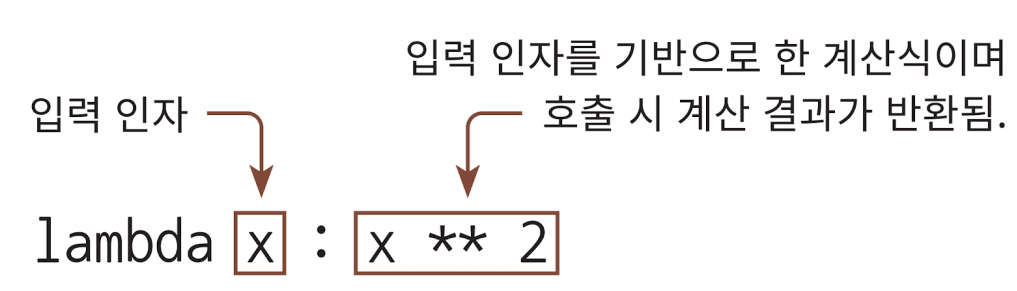

In [74]:
# 'Name'컬럼에서 길이를 세고 'Name_len'컬럼에 넣기
titanic_df['Name_len'] = titanic_df['Name'].apply(lambda x:len(x))
titanic_df[['Name', 'Name_len']].head(3)

,Name,Name_len
0,"Braund, Mr. Owen Harris",23
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",51
2,"Heikkinen, Miss. Laina",22


In [75]:
# 나이에 따른 새로운 컬럼 작성
titanic_df['Child_Adult'] = titanic_df['Age'].apply(lambda x: 'Child' if x<=15 else'Adult')
titanic_df[['Age', 'Child_Adult']].head(8)

,Age,Child_Adult
0,22.0,Adult
1,38.0,Adult
2,26.0,Adult
3,35.0,Adult
4,35.0,Adult
5,NaN,Adult
6,54.0,Adult
7,2.0,Child


In [76]:
# lambda에 여러개의 if 적용
titanic_df['Age_cat'] = titanic_df['Age'].apply(lambda x:'Child' if x<=15 else('Adult' if x <= 60 else 'Elderly'))
titanic_df['Age_cat'].value_counts()

Adult      609
Elderly    199
Child       83
Name: Age_cat, dtype: int64

In [78]:
# 함수 자체를 만들고 나서 lambda적용
def get_category(age):
    cat=''
    if age <=5: cat='Baby'
    elif age <= 12: cat='Child'
    elif age <= 18: cat='Teenager'
    elif age <= 25: cat='Student'
    elif age <= 35: cat='Young Adult'
    elif age <= 60: cat='Adult'
    else: cat='Elderly'
        
    return cat

titanic_df['Age_cat'] = titanic_df['Age'].apply(lambda x:get_category(x))
titanic_df[['Age', 'Age_cat']].head()

,Age,Age_cat
0,22.0,Student
1,38.0,Adult
2,26.0,Young Adult
3,35.0,Young Adult
4,35.0,Young Adult
